<a href="https://colab.research.google.com/github/Stella-kimani/stl-hypothyrodism-IP/blob/master/Moringa_Data_Science_Core_W8_IP_2020_08_Stella_Kimani_python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction

Specifying the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


#1.1.The Research Question

Using the given dataset, make a prediction whether a patient has  hypothyroidism or not.

#1.2.Understanding the context

 Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Accurate thyroid function tests are available to diagnose hypothyroidism. Treatment with synthetic thyroid hormone is usually simple, safe and effective once you and your doctor find the right dose for you.

#1.3.The Metric of success

The metric for success will be determined by building models that are optimized with an accuracy  that is above 80%

#1.4.Experimental design

Data Cleaning and preparation

   1.Load libraries and dataset

   2.Deal with missing values

   3.Deal with duplicated records

Perform Exploratory Data Analysis

   1.Univariate Analysis

   2.Bivariate Analysis

Split dataset into testing and training dataset

Carry out the following

Step 1: Decision trees:

For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM

Step 2 :
Part 2: SVM:

In this section, you may be required to clean the data a little bit so as to make sense of the features.

Document what transformation you've done on the data.

Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features.

Evaluating the models

Drawing conclusions and recommendations



#1.5 Data validation
This dataset is valid and contains information that is real and can be externally validated here
https://www.researchgate.net/figure/Hypothyroid-Data-Set_tbl1_291956549

#2.Data Preparation and cleaning

In [1]:
# Import the necessary libraries that i will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns


In [2]:
#Loading the dataset
df = pd.read_csv("/content/hypothyroid.csv", na_values="?")

On first visual inspection of the dataset, i notice that there are special characters ? which clearly represent missing values so let me replace them as nan values

In [3]:
#Let me preview the first 5 entries
df.head()

status   age sex on_thyroxine  ... FTI_measured   FTI TBG_measured TBG
0  hypothyroid  72.0   M            f  ...            y  10.0            n NaN
1  hypothyroid  15.0   F            t  ...            y  17.0            n NaN
2  hypothyroid  24.0   M            f  ...            y   0.0            n NaN
3  hypothyroid  24.0   F            f  ...            y   6.0            n NaN
4  hypothyroid  77.0   M            f  ...            y  44.0            n NaN

[5 rows x 26 columns]

In [4]:
#Let me preview the last 5 entries
df.tail()

status   age sex on_thyroxine  ... FTI_measured    FTI TBG_measured TBG
3158  negative  58.0   F            f  ...            y   95.0            n NaN
3159  negative  29.0   F            f  ...            y   98.0            n NaN
3160  negative  77.0   M            f  ...            y  104.0            n NaN
3161  negative  74.0   F            f  ...            y  137.0            n NaN
3162  negative  56.0   F            t  ...            y  143.0            n NaN

[5 rows x 26 columns]

In [5]:
# checking the columns present in our dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [4]:
#Let me ensure uniformity here by changing all column names to lower case
df.columns = df.columns.str.lower()
df.head()

status   age sex on_thyroxine  ... fti_measured   fti tbg_measured tbg
0  hypothyroid  72.0   M            f  ...            y  10.0            n NaN
1  hypothyroid  15.0   F            t  ...            y  17.0            n NaN
2  hypothyroid  24.0   M            f  ...            y   0.0            n NaN
3  hypothyroid  24.0   F            f  ...            y   6.0            n NaN
4  hypothyroid  77.0   M            f  ...            y  44.0            n NaN

[5 rows x 26 columns]

In [5]:
#Check the shape of our dataset
df.shape

(3163, 26)

I have 3163 rows and 26 columns

In [9]:
#Checking for the datatypes
df.info()
#It seems that i only have categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [5]:
#Checking for missing values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

Seems that i have alot of missing values in my dataset.Let me take care of them later on.

In [6]:
#Checking for duplicates in the dataset
df.duplicated().sum()

77

I have decided to take care of all duplicated values.

In [7]:
#Dropping the duplicates
df = df.drop_duplicates()

In [8]:
#Confirmation that duplicates have been dropped
df.duplicated().any()

False

In [8]:
#Check any unique values 
for column in df.columns:

  print("\n")
  print(column)
  print(df[column].unique())



status
['hypothyroid' 'negative']


age
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]


sex
['M' 'F' nan]


on_thyroxine
['f' 't']


query_on_thyroxine
['f' 't']


on_antithyroid_medication
['f' 't']


thyroid_surgery
['f' 't']


query_hypothyroid
['f' 't']


query_hyperthyroid
['f' 't']


pregnant
['f' 't']


sick
['f' 't']


tumor
['f' 't']


lithium
['f' 't']


goitre
['f' 't']


tsh_measured
['y' 'n']


tsh
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.0

The columns age, sex ,t3, tt4, t4u_measured,t4u, fti, tbg contained a special character ? that i replaced with nan, that shows missing values.

In [9]:
# Checking the statistical description of the dataframe

df.describe()

age          tsh  ...          fti         tbg
count  2648.000000  2631.000000  ...  2848.000000  251.000000
mean     51.112538     5.809320  ...   115.489080   31.070120
std      19.275099    24.023192  ...    60.147649   19.421922
min       1.000000     0.000000  ...     0.000000    0.000000
25%      35.000000     0.000000  ...    91.000000   21.000000
50%      54.000000     0.700000  ...   107.000000   28.000000
75%      67.000000     2.200000  ...   129.000000   33.500000
max      98.000000   530.000000  ...   881.000000  122.000000

[8 rows x 7 columns]

This gives me an elaborate statistical summary of my numerical columns in the dataframe.I have transposed for a better view.

#3.Data Cleaning

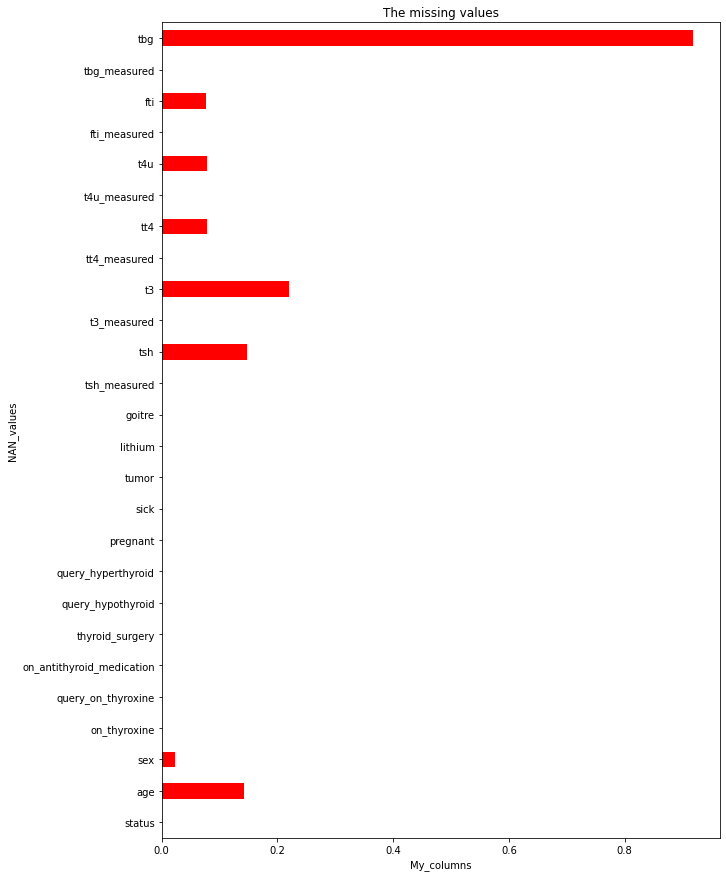

In [9]:
#First thing,let me visualize the missing values i have

df.isna().mean().plot(kind = 'barh', figsize = (10, 15), color = 'red')
plt.title('The missing values')
plt.ylabel('NAN_values')
plt.xlabel('My_columns')
plt.show()


The column tbg has too many missing values which will mean i will need to drop this column .The other columns seem to have a percentage of reasonable NAN values so i will not drop them.

In [10]:
#I will now replace the nan values in sex column(categorical) with the mode value of the column
df['sex']= df['sex'].fillna(df['sex'].mode()[0])

Sex being a categorical column can only be replaced by mode.

In [11]:
#Let me replace all null/ missing values in age, tsh, t3, tt4, t4u and fti with this mean
#df[column].fillna(df[column].mean(), inplace = True)
columns = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

for column in columns:
  df[column] = df[column].fillna(df[column].mean())


The reason why i have filled this columns with a mean is because these are numerical columns, this will take care of the null values in this numerical columns.

In [12]:
#Dropping the tbg and tbg_measured columns since they seem somehow related 
df.drop(['tbg', 'tbg_measured'],axis=1, inplace=True)

In [13]:
#Confirm that there is no null value left in the dataframe
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

Terrific let me move on to outliers.

Now let me check for outliers.

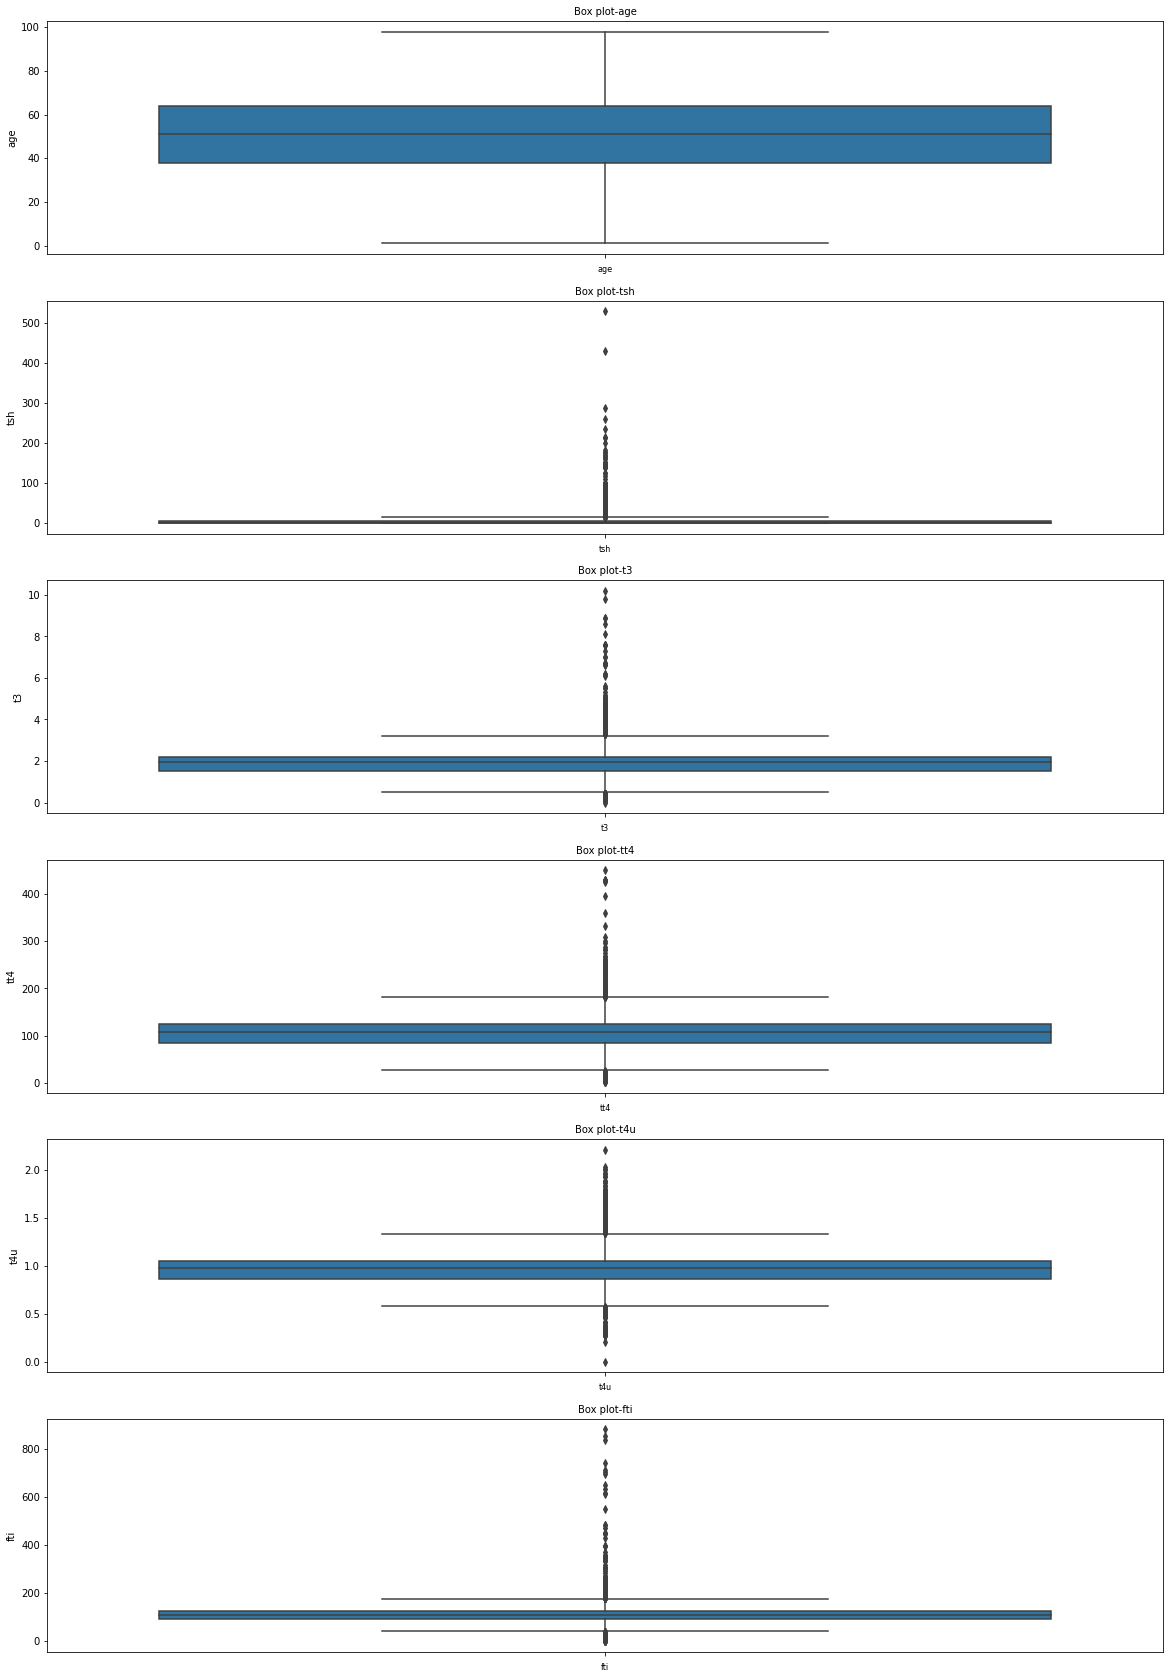

In [18]:
#Check all numerical columns for outliers
x = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

fig, ax = plt.subplots(len(x), figsize = (20, 30))

for i, col_val in enumerate(x):

  sns.boxplot(y= df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

As expected there are alot of outliers but it makes sense to keep them in the so as to make a better prediction.

1. In tt4 column which represents tests done which measures Thyroxine in patient ,has outliers ranging between 200-400 and few anomalies at zero.
2.In fti which  (free thyroxine index) column,  which is the last plot has outliers ranging from 200 to more than 800 and a few anomalies at 0.

I will not drop an anomaly or outlier as theses are tests done and different test results are expected.

#4.Exploratory Data Analysis

In [ ]:
!pip install -U pandas-profiling

In [22]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
ProfileReport(df, title = "Hypothorodism report")



Findings from the report

1.The status column has 2 distinct count ie hypothyroid	 -tested positive for hypothorodism and are 141 in number , and 2945 are negative,meaning they did not test positive for hypothorodism.

2.The Age column has a distinct count of 93  with a mean age of 51 years and the maximum age is 98 years with minimum age tested is 1 year old.

3.The sex column has a distinct count of 2 which is male and female.The female are more than male at 2192 and male tested are 894.

4.From Tumor column has  a boolean datatype with 3046 patients with tumors and 40 without a tumor

5.The sick column is has a boolean datatype  with of , 2989 not sick people and 97 sick .

6.The pregnant column has  a boolean datatype with  3025 not pregnant and 61 testing positive for pregnancy

7.The column query-Hyperthyroid has 2851 patients testing negative(false) and 235 testing positive.

8.The tsh-measured column has 2631 patients testing positive(true) and 455 testing negative(False)

9.There are no missing values as shown in missing value column.

10.The tt4 column has a distinct count of 269 and the mean value of this column is 108.70

11.The fti meaured has a boolean datatype and 2848 patients tested positive(yes) and 238 patients tested negative(no)

12.t3 and tt4 have a postive relationship with a correlation coefficient of 0.53 which is positive and strong.



Univariate Analysis

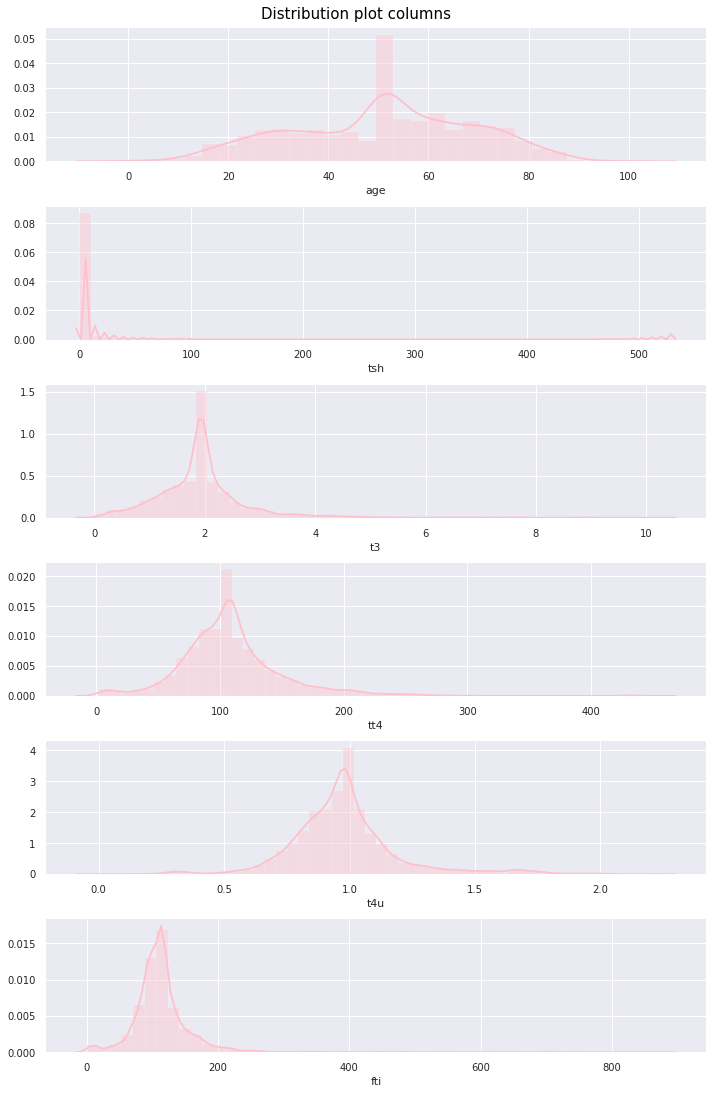

In [36]:
# distribution plots for the numerical column

columns_ = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns_), figsize = (10, 15))
fig.suptitle('Distribution plot columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, columns):
  sns.distplot(df[name], ax = ax, kde = True, color = 'pink')
plt.tight_layout()

1.From the firtst distribution plot, (age column) it seems that patients are aged between 40 - 60 years old.

2.The plots are mostly positively skewed which is expected due to presence of outliers.There is also variability in different tests results.


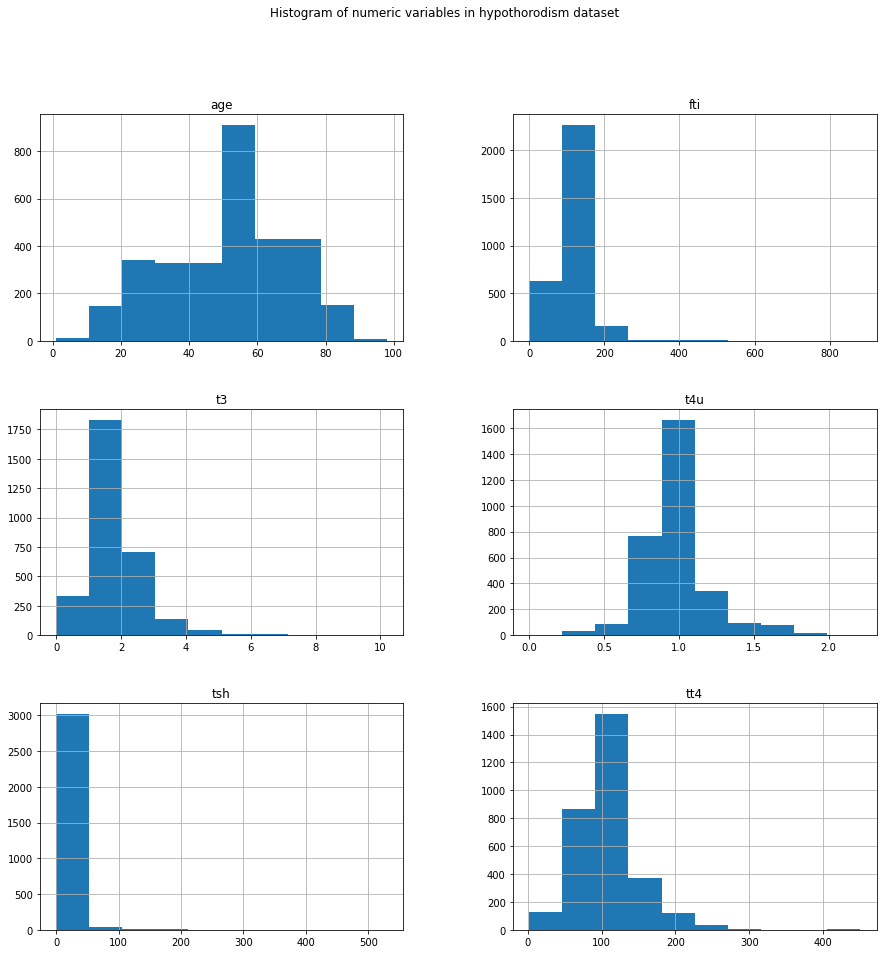

In [18]:
df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in hypothorodism dataset")
plt.savefig('Histogram')
plt.show()
plt.show()

1.From the plot of age majority of patients are between 50 and 60 years old hence that is why the mean age is 51 years

2.In tt4 column,the plot is skewed to the right ,this is due to outliers so majority of observations lie to the right.


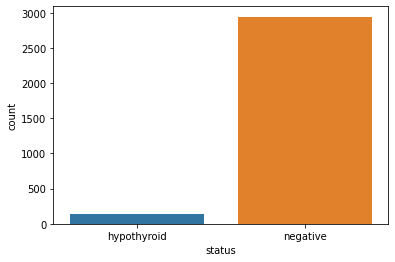

In [19]:
#plotting relationships

sns.countplot(df['status'])

 most of the observations have tested negative and Those with hypothyroidism are less ,ie 141 patients.

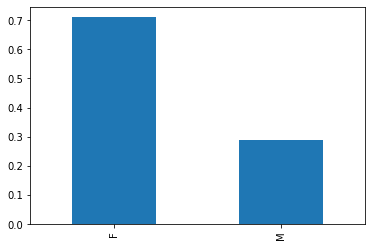

In [20]:
# Plotting sex by percentage 
(df['sex'].value_counts()/len(df)).plot.bar()

From this visualization majority of patients are female 

Bivariate analysis

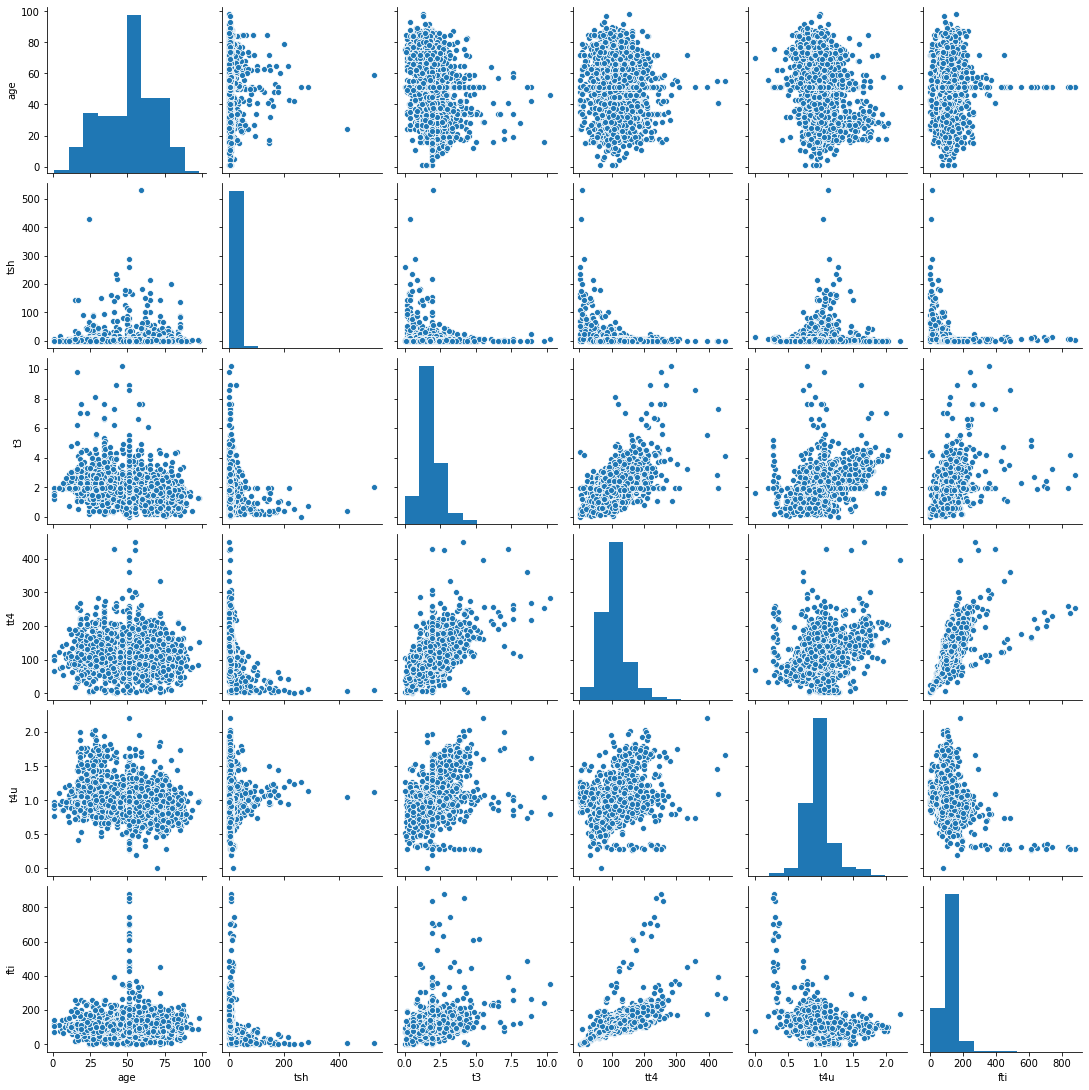

In [24]:
#Let me plot scatter plots to see the relationships
sns.pairplot(df)

From the scatter plots my observation is that Hyperthyroidism shows up more in tsh tests,show more cases of hypothyroidism implying that that variable is animportant factor.
There is a strong positive relationship between fti and tt4 tests.
The scatter plots show  relationship between age and tests columns eg fti test,tsh,t3,tt4, t4u is not linear or strong meaning that age is not a strong factor for the tests.I expect the correlation to be negative or weakly correlated.

#5.Multicolinearity

In [16]:
correlation = df.corr()
correlation

age       tsh        t3       tt4       t4u       fti
age  1.000000 -0.007352 -0.265743 -0.086317 -0.188786  0.017737
tsh -0.007352  1.000000 -0.169724 -0.309057  0.072508 -0.240105
t3  -0.265743 -0.169724  1.000000  0.533845  0.386450  0.281517
tt4 -0.086317 -0.309057  0.533845  1.000000  0.320415  0.677345
t4u -0.188786  0.072508  0.386450  0.320415  1.000000 -0.294437
fti  0.017737 -0.240105  0.281517  0.677345 -0.294437  1.000000

There is a strong positive relationship between fti and tt4  at 0.67.This is a strong positive correlation
There is weak correlation between tsh and age variable at -0.007

In [31]:
# Find the VIF matrix
print("Below is our VIF matrix\n")
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF


Below is our VIF matrix



age       tsh        t3       tt4       t4u       fti
age  1.094190  0.018854  0.299065 -0.108785  0.128115  0.012335
tsh  0.018854  1.178607  0.108195  0.674463 -0.438052 -0.333626
t3   0.299065  0.108195  1.615132 -0.442959 -0.517976 -0.286488
tt4 -0.108785  0.674463 -0.442959  4.621935 -2.426357 -3.556480
t4u  0.128115 -0.438052 -0.517976 -2.426357  2.768795  2.497084
fti  0.012335 -0.333626 -0.286488 -3.556480  2.497084  4.144524

I can see that no VIF Factor is above 5, which is my threshold.So i will not drop any column.

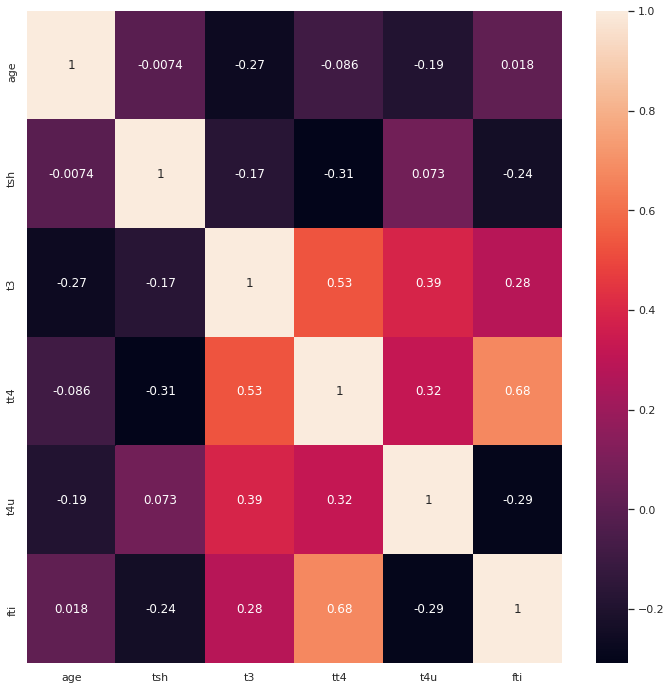

In [33]:
# Plotting visualisation of the matrix for better clarity 

plt.figure(figsize=(12, 12))  

# Creating our visualisation  
# 
sns.heatmap(correlation, annot = True) 

This visualises the correlations more.As expected the correlation between age and tests eg fti, t4u,tsh,t3,tt4 is a weak correlation.
However tt4 and fti have a stong positive correlation of 0.68

#6.Modelling

Before i start modelling, i am using accuracy , F1 Score which is, The F1 score is used when the false negatives and false positives are crucial.A higher F1 score is better and means that i have low false positives and low false negatives, and finally RMSE metrics.The higher the accuracy and F1 score the better and a lower RMSE is better.

In [14]:
#Encoding the columns so it can be easier to work with
#Let me start with the true and false, represented by t/f
cols = ['on_thyroxine','query_on_thyroxine', 'on_antithyroid_medication','thyroid_surgery', 'query_hypothyroid','query_hyperthyroid','pregnant','sick', 
        'tumor', 'lithium', 'goitre']
for column in cols:
  encode = {column:{'f':0,'t':1}}
  df.replace(encode,inplace=True)
  df[column] = df[column].astype(int)



In [15]:
#Encoding the yes and no ie y/n columns so that i can work with numbers
cols_ = ['tsh_measured', 't3_measured',  'tt4_measured',  't4u_measured', 'fti_measured']

for column in cols_:
  category_ = {column:{'n':0, 'y':1}}
  df.replace(category_,inplace=True)
  df[column] = df[column].astype(int)



In [16]:
#This encodes the sex column so that male is represented by 0 and female by 1
Sex_ = {'sex':{'M':0,'F':1}}
df.replace(Sex_,inplace=True)
df['sex'].astype(int)


0       0
1       1
2       0
3       1
4       0
       ..
3158    1
3159    1
3160    0
3161    1
3162    1
Name: sex, Length: 3086, dtype: int64

In [18]:
print(df)

           status   age  sex  ...   t4u  fti_measured    fti
0     hypothyroid  72.0    0  ...  1.48             1   10.0
1     hypothyroid  15.0    1  ...  1.13             1   17.0
2     hypothyroid  24.0    0  ...  1.00             1    0.0
3     hypothyroid  24.0    1  ...  1.04             1    6.0
4     hypothyroid  77.0    0  ...  1.28             1   44.0
...           ...   ...  ...  ...   ...           ...    ...
3158     negative  58.0    1  ...  0.91             1   95.0
3159     negative  29.0    1  ...  1.01             1   98.0
3160     negative  77.0    0  ...  0.68             1  104.0
3161     negative  74.0    1  ...  0.48             1  137.0
3162     negative  56.0    1  ...  0.97             1  143.0

[3086 rows x 24 columns]


#Part1: Decision Trees

#6.1 Using Random Forest

In [18]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:

from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is status, so let's use that column as our Y 

y = np.where(df.status == 'hypothyroid', 1, 0)
X = df.drop('status', axis = 1)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


Actual   Predicted
count  926.000000  926.000000
mean     0.042117    0.033477
std      0.200964    0.179977
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000

I have compared actual and preicted results and from the output i expect very high accuracy and F1 score for this model. 

In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[886,   1],
       [  9,  30]])

In [21]:

# Show  the accuracy of the model

print(f'accuracy score is for Random forest: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')


accuracy score is for Random forest: 0.9892008639308856 and the f1 score is 0.8571428571428572


Let me also have a look at the errors ,the lower the better which will reinforce the theory that the actual and predicted results are close.

In [22]:
from sklearn import metrics

# Looking at the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01079913606911447
Mean Squared Error: 0.01079913606911447
Root Mean Squared Error: 0.10391889178159316


A low RMSE emphasizes that the actual value and predicted values are more close to each other.

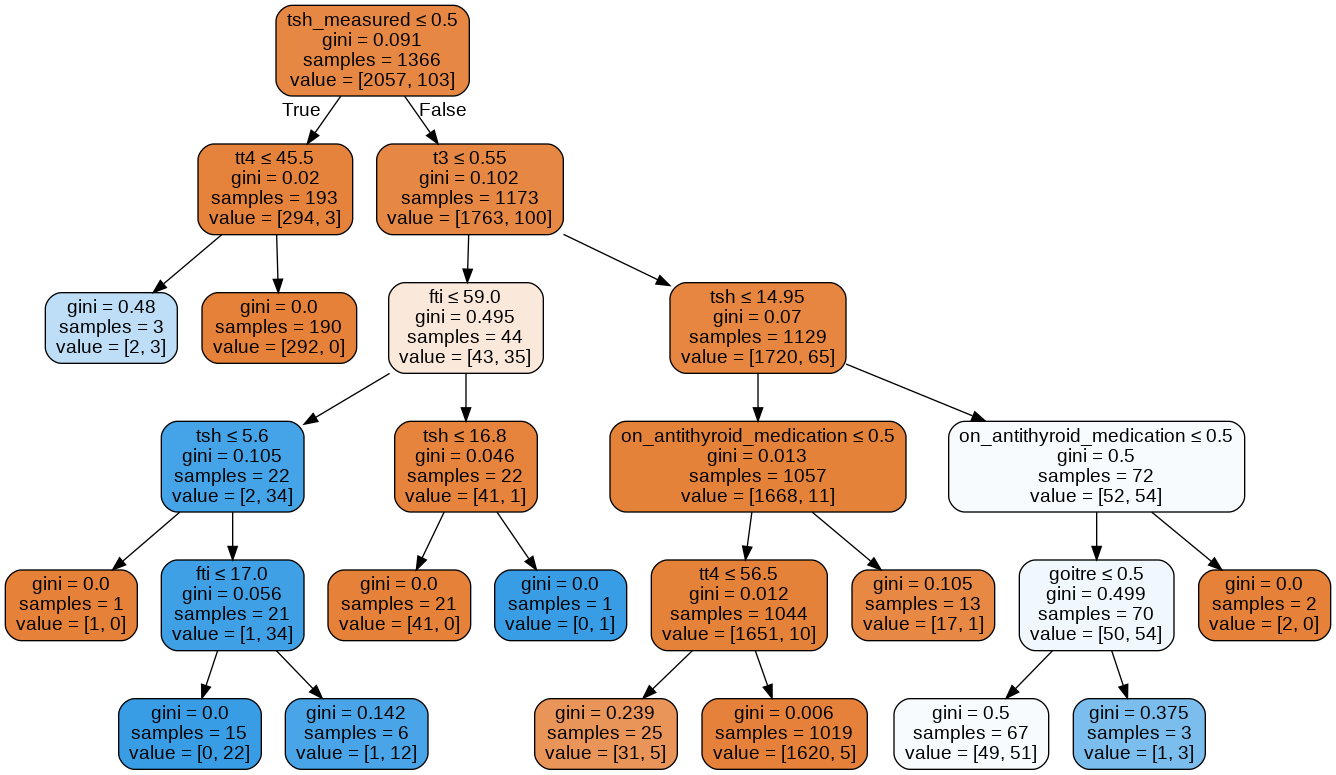

In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




In [22]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

#  I will sort the values in descending order, since i care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.01), ('tsh', 0.45), ('t3_measured', 0.0), ('t3', 0.21), ('tt4_measured', 0.0), ('tt4', 0.04), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.27)]

Variable: tsh                  Importance: 0.45
Variable: fti                  Importance: 0.27
Variable: t3                   Importance: 0.21
Variable: tt4                  Importance: 0.04
Variable: on_antithyroid_medication Importance: 0.01
Variable: tsh_measured         Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0

These first 6 are the features i will use to model since the others are not too important.

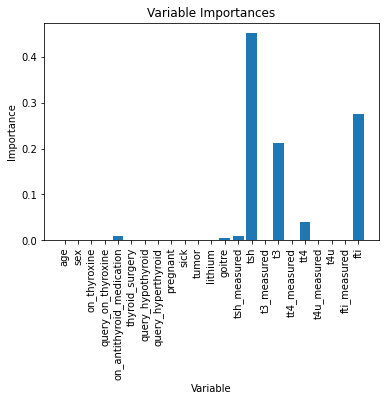

In [24]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart(horizontal)
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


From the plot above tsh test and fti are the most important, followed by t3 and tt4 respectively.

In [25]:
#Let me now model with important features ie 
#tsh                        Importance: 0.45
#fti                        Importance: 0.27
# t3                        Importance: 0.21
#tt4                        Importance: 0.04
#on_antithyroid_medication  Importance: 0.01
#tsh_measured               Importance: 0.01
#I want to see if there is any improvement interms of accuracy and F1score  from my base model
N = np.where(df['status'] == 'hypothyroid', 1, 0)

M = df[['tsh', 'fti', 't3', 'tt4', 'on_antithyroid_medication', 'tsh_measured']]



# Split the data into training and testing sets
M_train, M_test, N_train, N_test = train_test_split(M, N, test_size = 0.3, random_state = 0)
# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(M_train, N_train)


# Making the predictions
y_pred = forest.predict(M_test)


In [26]:
# Access Accuracy and F1 Score of the new model with selected features

print(f'accuracy score for new random forest model is : {accuracy_score(y_test, y_pred)} and New F1 score is {f1_score(y_test, y_pred)}')

accuracy score for new random forest model is : 0.9924406047516199 and New F1 score is 0.9066666666666667


Wow the accuracy score has improved from 0.9892008639308856 to to  0.9924406047516199  and the f1 score from 0.8571428571428572 to 0.9066666666666667
Clearly am on the right track with this model.Let me go ahead and visualize the trees just for one more cross check.

In [27]:
# Looking at the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00755939524838013
Mean Squared Error: 0.00755939524838013
Root Mean Squared Error: 0.08694478275537947


The RMSE of the model with 6 important features is better ie lower than the base model with all features included,so the new model has actual and predicted values more closer so predicting power is better,which is proved by comparing using accuracy and F1 score as seen above.

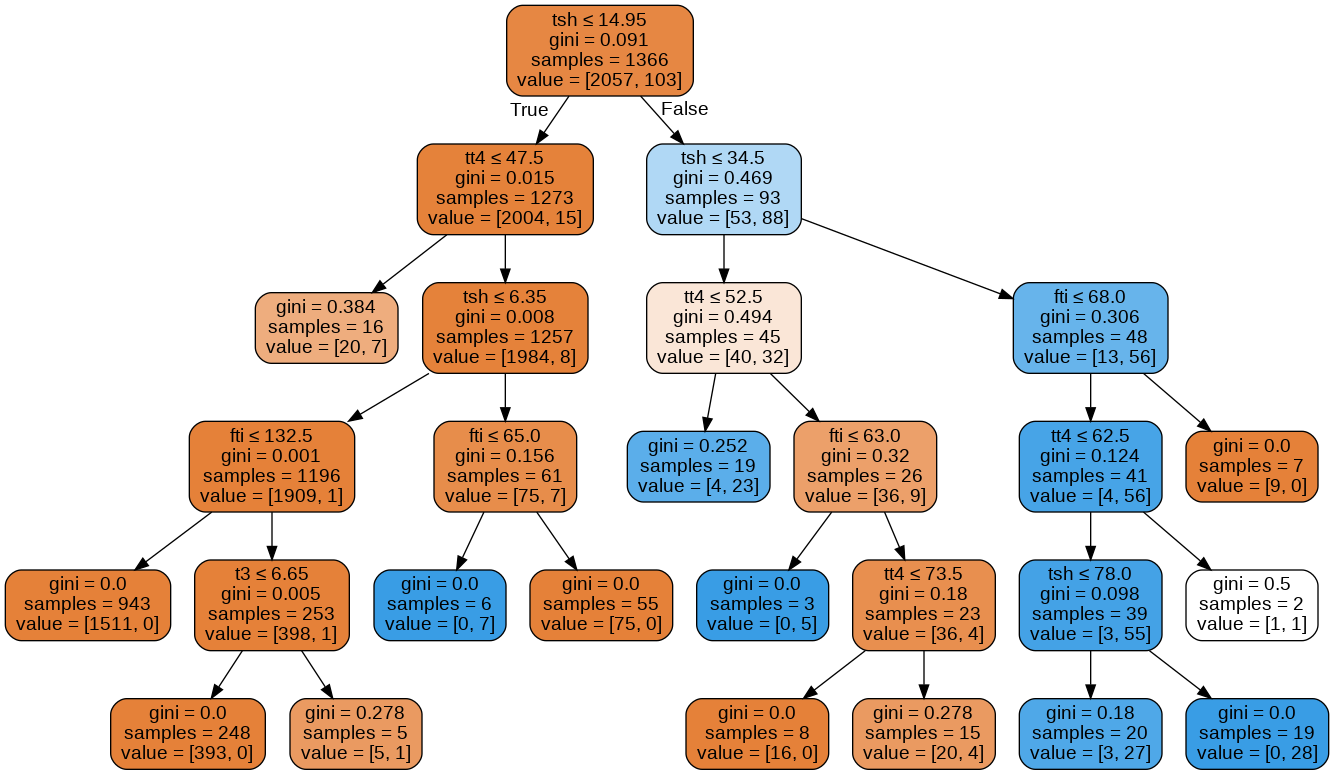

In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = M.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Modelling (Random Forest) using the 2 most important features.

In [28]:
#Let me use only the top 2 most important features
n = np.where(df['status'] == 'hypothyroid', 1, 0)

m = df[['tsh', 'fti']]


# Split the data into training and testing sets
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = 0.3, random_state = 0)
# The random_state variable is here to guarantee that we all see the same numbers.
 
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(m_train, n_train)

# Making the predictions
y_pred = forest.predict(m_test)
# Access Accuracy and F1 Score of the new model with  2 best selected features

print(f'accuracy score for 2 features random forest model is : {accuracy_score(y_test, y_pred)} and New F1 score is {f1_score(y_test, y_pred)}')

accuracy score for 2 features random forest model is : 0.9946004319654428 and New F1 score is 0.935064935064935


Of all the random forest models the one using 2 important features has the best accuracy and F1  score.

Base model_all features = Accuracy is 0.9892008639308856 and the f1 score is 0.8571428571428572

New model_only 6 features = Accuracy is 0.9924406047516199 and New F1 score is 0.9066666666666667

Third model with 2 most important features = Accuracy is 0.9946004319654428 and New F1 score is 0.935064935064935

So features do impact our model in terms of accuracy and F1 score where feature importance is followed.

#Adaboost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

y = np.where(df.status == 'hypothyroid', 1, 0)
X = df.drop('status', axis = 1)

#Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process

ada_boost = AdaBoostClassifier(random_state=  0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


In [67]:
#Lets get the accuracy of this ada boost model
model_accuracy = accuracy_score(y_test,y_pred_ada)
model_accuracy

0.9935205183585313

This accuracy of Adaboost is higher than SVM models ,one advantage of the adaboost is that it iteratively corrects the mistakes of any weak classifier and improves accuracy by combining weak learners. Even though i used all features while modelling with adaboost,the accuracy is and F1 score is almost equal to the Random forest model with the top 2 important features.

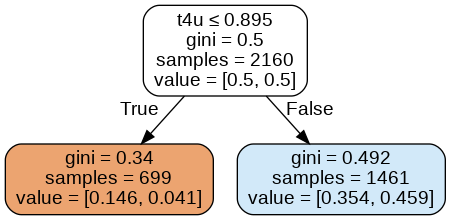

In [72]:
#Let me visualize 10th stump in the random forest
dot_data = StringIO()
#Let me pick a tree
tree = ada_boost.estimators_[10]
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [73]:
F1 =f1_score(y_test, y_pred_ada)
print(F1)

0.9210526315789475


The F1 score for adaboost is just as high as the best random forest model which has 2 most important features. This shows that ada boost is very efficient for this research question.

#GradientBoost Classifier

In [87]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

Y_gradient = np.where(df.status == 'hypothyroid', 1, 0)
X_gradient = df.drop(['status'],axis=1).values

#Splitting into training and test data
X_gradient_train, X_gradient_test, Y_gradient_train, y_gradient_test = train_test_split(X_gradient, Y_gradient, test_size = 0.3, random_state = 0)

#Setting the number of trees to work with as 100
target_number_of_trees = 100
#Set the parameters for boosting and fitting model
gradc = GradientBoostingClassifier(learning_rate=1, n_estimators=target_number_of_trees,max_depth=5, random_state=0)
gradc = gradc.fit(X_gradient_train,Y_gradient_train)

#Prediction
y_pred_gradc = gradc.predict(X_gradient_test)


In [92]:
model_accuracy = accuracy_score(y_test,y_pred_gradc)
model_accuracy


0.9794816414686826

In [93]:
F1 =f1_score(y_test, y_pred_gradc)
print(F1)

0.7164179104477612


Compared to Ada boost ,Gradient boost is lower in both accuracy and F1 score.Probably i can increase it by increasing the learning rate and determine an optimum number of tree for this learning rate, i will do that when challenging the model

#Part 2: Support Vector Machine

#.SVM using Linear Kernel

In [29]:
#In this model i will use all features.
y = np.where(df.status == 'hypothyroid', 1, 0)
X = df.drop('status', axis = 1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(618,)

In [30]:
# Applying the reduction algorithm: PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape


(3086, 2)

In [31]:
# Let's now build the svm model 
model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)


In [64]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy



0.9870550161812298

In [32]:
print(f'accuracy score for linear SVM is : {accuracy_score(y_test, y_pred)} and  F1 score is {f1_score(y_test, y_pred)}')


accuracy score for linear SVM is : 0.9870550161812298 and  F1 score is 0.8260869565217391


In [33]:
# Looking at the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.012944983818770227
Mean Squared Error: 0.012944983818770227
Root Mean Squared Error: 0.11377602479771486


I will compare these errors to my other kernels , but an RMSE of 0.1 is okay,it means the actual value and predicted values are close

#6.24)SVM using a polynomial Kernel

In [38]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# Checking the accuracy of the poly  model
poly_pred = polyclassifier.predict(X_test)
model_accuracy = accuracy_score(y_test,poly_pred)

print(f'accuracy score for SVC_poly model is : {accuracy_score(y_test,poly_pred)} and  F1 score is {f1_score(y_test,poly_pred)}')

accuracy score for SVC_poly model is : 0.9854368932038835 and  F1 score is 0.7804878048780487


Comparing the accuracy score and F1 score of the both models, the model with a linear Kernel is way better with an accuracy of 0.9870550161812298 and  F1 score is 0.8260869565217391, while the model using a polynomial Kernel has an accuracy of 0.98543689320 and F1 score of 0.78048, let me compare using the errors

In [40]:
# Looking at the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))

Mean Absolute Error: 0.014563106796116505
Mean Squared Error: 0.014563106796116505
Root Mean Squared Error: 0.12067769800636945


As you can observe the RMSE for the polynomial Kernel model is higher than the one using a linear Kernel, ie linear Kernel is 0.11377602479771486 and for polynomial kernel model is 0.12067769800636945. So by all means the linear kernel model has outperformed the polynomial kernel model interms of accuracy , F1 score and lower RMSE

#6.25SVM Using the RBF Kernel

In [46]:
# Using the RBF Kernel
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# Checking the accuracy of the poly  model
rbf_pred = rbfclassifier.predict(X_test)
model_accuracy = accuracy_score(y_test,rbf_pred)
print(f'accuracy score for SVC_rbf model is : {accuracy_score(y_test,rbf_pred)} and  F1 score is {f1_score(y_test,rbf_pred)}')

accuracy score for SVC_rbf model is : 0.9854368932038835 and  F1 score is 0.7999999999999999


The accuracy score of the is almost similar to that of the polynomial kernel model.The F1 score is used when the false negatives and false positives are crucial.A higher F1 score is better and means that i have low false positives and low false negatives,so in this case RBF Kernel is better in terms of F1 scores.Still the linear kernel model is the best of the three models.

In [48]:
# Looking at the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rbf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rbf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rbf_pred)))

Mean Absolute Error: 0.014563106796116505
Mean Squared Error: 0.014563106796116505
Root Mean Squared Error: 0.12067769800636945


The RMSE for the RBF SVM model is almostsimilar to the poly model  0.12067769800636945 but is higher than the linear model.
Random forest has a much lower RMSE than all SVM Models meaning that it has a better predicting power as actual and predicted values are very close 

#7.Challenging the models

In [53]:
#Hyperparameter tuning SVM
#Let me start with SVM model to find the best gamma
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV, KFold


In [20]:
# Creating random search using 5-fold cross validation
#Creating a hyperparameters parameters 
hyperparameters = {'C': np.arange(1, 102, 10),'gamma': np.linspace(2**-5, 2**5, 10)} #The lowest gamma is 2 power -5 and highest gamma is 2 power 5, then increment this by 10
# Folds
kfold = KFold(n_splits=3, shuffle=True)
#model = SVC(kernel = 'Poly')
model = SVC(kernel='linear')
search = RandomizedSearchCV(polyclassifier, param_distributions=hyperparameters, scoring = 'f1', cv = kfold)
# Using my variables

X = df[['fti', 'tsh']]
y = np.where(df.status == 'hypothyroid', 1, 0)

# Fitting the grid search 
search.fit(X, y)
# Checking for the ideal parameters

print(f'The ideal parameters are: {search.best_params_}')

The ideal parameters are: {'gamma': 17.791666666666668, 'C': 81}


In [21]:
X_1 = df[['fti', 'tsh']]
y_1 = np.where(df.status == 'hypothyroid', 1, 0)

#  Split the data into train and test set
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)
y_1_test.shape

(618,)

In [22]:
# Applying the reduction algorithm: PCA
# Applying the reduction algorithm: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_1)
X_1 = pca.transform(X_1)


In [56]:
# Let's now build the svm model 
model = SVC(kernel = 'linear', gamma=17 , C= 81)

# fitting to training data
model.fit(X_1_train, y_1_train)

# making predictions
y_1_pred = model.predict(X_1_test)


In [57]:
print(f'accuracy score for hypertuned linear SVM is : {accuracy_score(y_test, y_1_pred)} and  F1 score is {f1_score(y_test, y_pred)}')


accuracy score for hypertuned linear SVM is : 0.9805825242718447 and  F1 score is 0.8260869565217391


Challenging the Gradient boost model.


In [51]:
#For this model i will opt to  increase the learning Rate and increase the number of target trees.
#I will use the first model i created as a base model.
#My aim is to answer the question:If i increase the learning rate what happens to my model accuracy?

Y_gradient = np.where(df.status == 'hypothyroid', 1, 0)
X_gradient = df.drop(['status'],axis=1)

#Splitting into training and test data
X_gradient_train, X_gradient_test, Y_gradient_train, y_gradient_test = train_test_split(X_gradient, Y_gradient, test_size = 0.3, random_state = 0)

#Increasing the number of trees to work with as 200
target_number_of_trees = 200
#Set the parameters for boosting and fitting model
gradc = GradientBoostingClassifier(learning_rate=2, n_estimators=target_number_of_trees,max_depth=5)
gradc = gradc.fit(X_gradient_train,Y_gradient_train)

#Prediction
y_pred_gradc_2 = gradc.predict(X_test)

In [60]:
model_accuracy = accuracy_score(y_test,y_pred_gradc_2)
model_accuracy


0.9789644012944984

In [59]:
print(f'accuracy score for new gradient_boost model is : {accuracy_score(y_test, y_pred_gradc_2)} and  F1 score is {f1_score(y_test, y_pred_gradc_2)}')

accuracy score for new gradient_boost model is : 0.9789644012944984 and  F1 score is 0.6829268292682927


From the first base model of gradient boosting, i had an accuracy of 0.9794816414686826 and an F1 score of 0.7164179104477612, after i increased the learning rate to 2 from 1 and increasing the target number of trees to 200, the accuracy decreased to 0.9789644 and F1 score decreased from 0.71 th 0.6829.
This means that i dont have the optimal learning rate and optimal target number of trees and this can be only improved by hyperparameter tuning.

#8.Conclusion

The models have performed very well, surpassed my 80% accuracy threshold which i set as my metric for success.For this case in particular Adaboost model is exceptional with a high accuracy and F1 score even without specifically dealing with the top two important features with are the tsh (Thyroid stimulating hormone )test and  fti(free thyroxine index) test.
The random forest model that has the top 2 features in the model however has the highest accuracy and F1 score.
In support vector machine models the best model is the Linear Kernel model with the high accuracy and F1 score.
Parameter tuning will increase the f1 score and accuracy in the gradient boost model.